In [8]:
import datetime as dt
import pandas as pd
import requests
import bs4 as bs
import pandas_datareader as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import warnings
warnings.filterwarnings("ignore")

In [9]:
html = requests.get('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')
tickers= [] #we're going to store the company ticker symbols
company_names = []

In [10]:
soup = bs.BeautifulSoup(html.text)
table = soup.find('table',{'class':'wikitable sortable'})
rows = table.findAll('tr')[1:]
for row in rows:
    ticker = row.findAll('td')[0].text
    company_name = row.findAll('td')[1].text
    tickers.append(ticker[:-1])
    company_names.append(company_name)

In [11]:
tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG

In [12]:
company_names

['3M',
 'Abbott Laboratories',
 'AbbVie',
 'Abiomed',
 'Accenture',
 'Activision Blizzard',
 'Adobe',
 'Advanced Micro Devices',
 'Advance Auto Parts',
 'AES Corp',
 'Aflac',
 'Agilent Technologies',
 'Air Products & Chemicals',
 'Akamai Technologies',
 'Alaska Air Group',
 'Albemarle Corporation',
 'Alexandria Real Estate Equities',
 'Alexion Pharmaceuticals',
 'Align Technology',
 'Allegion',
 'Alliant Energy',
 'Allstate Corp',
 'Alphabet (Class A)',
 'Alphabet (Class C)',
 'Altria Group',
 'Amazon',
 'Amco',
 'Ameren Corp',
 'American Airlines Group',
 'American Electric Power',
 'American Express',
 'American International Group',
 'American Tower',
 'American Water Works',
 'Ameriprise Financial',
 'AmerisourceBergen',
 'Ametek',
 'Amgen',
 'Amphenol Corp',
 'Analog Devices',
 'Ansys',
 'Anthem',
 'Aon',
 'AO Smith',
 'APA Corporation',
 'Apple',
 'Applied Materials',
 'Aptiv',
 'ADM',
 'Arista Networks',
 'Arthur J. Gallagher & Co.',
 'Assurant',
 'AT&T',
 'Atmos Energy',
 'Auto

In [13]:
start_date = input("Input the start date in DD/MM/YYYY format")
start_date_split = start_date.split('/')
start_year = start_date_split[2]
start_month = start_date_split[1]
start_day = start_date_split[0]

start = dt.datetime(int(start_year), int(start_month), int(start_day))

end_date = input("Input the end date in DD/MM/YYYY format")
end_date_split = end_date.split('/')
end_year = end_date_split[2]
end_month = end_date_split[1]
end_day = end_date_split[0]

end = dt.datetime(int(end_year), int(end_month), int(end_day))


Input the start date in DD/MM/YYYY format22/05/2019
Input the end date in DD/MM/YYYY format17/12/2020


Input the company name :Advanced Micro Devices


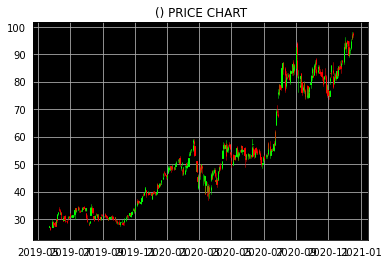

<Figure size 720x720 with 0 Axes>

In [14]:
target_company = input("Input the company name :")
for i in range(len(company_names)):
    if(company_names[i] == target_company):
        data = web.DataReader(tickers[i], 'yahoo', start, end)
        df = data[['Open','High','Low','Close']]
        df.reset_index(inplace = True)
        df['Date'] = df['Date'].map(mdates.date2num)
        ax = plt.subplot()
        ax.grid(True)
        ax.set_axisbelow(True) #set axis below will make the grid below our graph point
        ax.set_title("() PRICE CHART".format(tickers[i]))
        ax.set_facecolor('black')
        ax.tick_params(axis = 'x', color = 'white')
        ax.tick_params(axis = 'y', color = 'white')
        ax.xaxis_date()#converts numerical data to date format again

        candlestick_ohlc(ax, df.values, width = 0.5, colorup = '#00ff00')

        f = plt.figure()
        f.set_figwidth(10)
        f.set_figheight(10)

        plt.show()

In [26]:
df = pd.DataFrame()
df['Ticker'] = tickers
df['Company Name'] = company_names
df

,Ticker,Company Name
0,MMM,3M
1,ABT,Abbott Laboratories
2,ABBV,AbbVie
3,ABMD,Abiomed
4,ACN,Accenture
...,...,...
500,YUM,Yum! Brands
501,ZBRA,Zebra Technologies
502,ZBH,Zimmer Biomet
503,ZION,Zions Bancorp


In [27]:
df.to_csv('SP500.csv', index=False)